In [0]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()
from tensorflow.keras.callbacks import EarlyStopping

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
from PIL import Image
import glob
import cv2
train_images=[]
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/*.jpeg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (50,50))
    train_images.append([output,0])

In [0]:
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/chest_xray/train/PNEUMONIA/*.jpeg'): 
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal,(50,50))
    train_images.append([output,1])

In [0]:
import random
random.shuffle(train_images)

In [0]:
x_train=[]
y_train=[]
for im,label in train_images:
  x_train.append(im)
  y_train.append(label)

[[][][][],[][][][]
[[][][][]],[[][][][]]

In [0]:
x_train=np.array(x_train).reshape(-1,50,50,3)

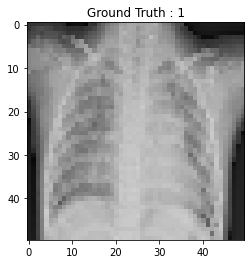

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50,:,:])
plt.title('Ground Truth : {}'.format(y_train[50]))
plt.show()

In [0]:
test_images=[]
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/chest_xray/test/NORMAL/*.jpeg'): 
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (50,50))
    test_images.append([output,0])

In [0]:
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/chest_xray/test/PNEUMONIA/*.jpeg'): 
    img_normal = cv2.imread(filename)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (50,50))
    test_images.append([output,1])

In [0]:
random.shuffle(test_images)

In [0]:
x_test=[]
y_test=[]
for im,label in test_images:
  x_test.append(im)
  y_test.append(label)

In [0]:
x_test=np.array(x_test).reshape(-1,50,50,3)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

01

[1,0] [0,1]
51231,50,50,3

pnemonia 






In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(x_train.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [0]:
epochs = 150
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
monitor=EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',restore_best_weights=True)

In [0]:

model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor],epochs=150, batch_size=512)


Train on 5216 samples, validate on 624 samples
Epoch 1/150
5216/5216 [==============================] - 499s 96ms/step - loss: 5.2437 - accuracy: 0.7297 - val_loss: 0.6923 - val_accuracy: 0.6250
Epoch 2/150
5216/5216 [==============================] - 489s 94ms/step - loss: 0.6897 - accuracy: 0.7429 - val_loss: 0.6900 - val_accuracy: 0.6250
Epoch 3/150
5216/5216 [==============================] - 490s 94ms/step - loss: 0.6849 - accuracy: 0.7429 - val_loss: 0.6876 - val_accuracy: 0.6250
Epoch 4/150
5216/5216 [==============================] - 487s 93ms/step - loss: 0.6800 - accuracy: 0.7429 - val_loss: 0.6852 - val_accuracy: 0.6250
Epoch 5/150
5216/5216 [==============================] - 486s 93ms/step - loss: 0.6751 - accuracy: 0.7429 - val_loss: 0.6829 - val_accuracy: 0.6250
Epoch 6/150
5216/5216 [==============================] - 487s 93ms/step - loss: 0.6704 - accuracy: 0.7429 - val_loss: 0.6808 - val_accuracy: 0.6250
Epoch 7/150
5216/5216 [==============================] - 488s 94

In [0]:
import pickle
with open("/content/drive/My Drive/Colab Notebooks/chest_xray/MODEL_V2_PN.pk2",'wb') as file:
      pickle.dump(model,file)

In [0]:
x=model.predict_classes(x_train[[50],:])
print(x[0])

1
